In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from matplotlib import style, pyplot as plt

df = pd.DataFrame({'a': [1, 2, 3, 4, 5], 'b': [2, 4, 6, 8, 10]})
df

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [2]:
mu = 0 # our mean
sigma = 0.1 # std
sample = np.random.normal(mu, sigma, 1000)
abs(mu - np.mean(sample)) < 0.01

True

C:\Users\Daiyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


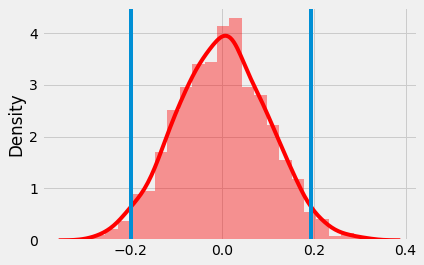

In [3]:
style.use('fivethirtyeight')
ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample, 97.5), 0)
ax.axvline(np.percentile(sample, 2.5), 0)

<AxesSubplot:ylabel='Density'>

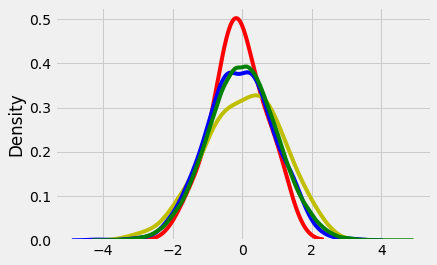

In [4]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)
t_df100000 = np.random.standard_t(df=100000, size=100000)

sns.kdeplot(t_df10, color='r')
sns.kdeplot(t_df100, color='y')
sns.kdeplot(t_df1000, color='b')
sns.kdeplot(t_df100000, color='g')

In [5]:
i = 10
for sample in [t_df10, t_df100, t_df1000, t_df1000]:
    print(f't-distribution with {i} degrees of freedom.')
    print(f'Mean: {sample.mean()}')
    print(f'Standard Deviation: {sample.std()}')
    print(f'Variants: {sample.var()}')
    print('---' * 50)
    i *= 10

t-distribution with 10 degrees of freedom.
Mean: -0.10889488350675376
Standard Deviation: 0.6893126931838293
Variants: 0.4751519889843439
------------------------------------------------------------------------------------------------------------------------------------------------------
t-distribution with 100 degrees of freedom.
Mean: 0.04381988396940475
Standard Deviation: 1.0755646770705478
Variants: 1.1568393745618717
------------------------------------------------------------------------------------------------------------------------------------------------------
t-distribution with 1000 degrees of freedom.
Mean: -0.05700977279450031
Standard Deviation: 0.9793633935545882
Variants: 0.9591526566347592
------------------------------------------------------------------------------------------------------------------------------------------------------
t-distribution with 10000 degrees of freedom.
Mean: -0.05700977279450031
Standard Deviation: 0.9793633935545882
Variants: 0.9591526

In [6]:
def ind_ttest(data1, data2, alpha=0.05):
    mean1, mean2 = np.mean(data1), np.mean(data2) # calculating mean of all values from each list
    se1, se2 = st.sem(data1), st.sem(data2) # computes standard error of the mean
    sed = np.sqrt(se1 ** 2 + se2 ** 2) # computes standard error of the difference
    tstat = (mean1 - mean2) / sed # calculating t-statistics
    d_free = len(data1) + len(data2) - 2 # degree of freedom
    cv = st.t.ppf(1.0 - alpha, d_free) # critical value
    p = (1.0 - st.t.cdf(abs(tstat), df) * 2) # calculating p-value using cumulative distribution
    return tstat, d_free, cv, p # returning the values we calculated
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ind_ttest(a, b)

(-7.385489458759964,
 18,
 1.7340636066175354,
 array([[-0.91432233, -0.98215591],
        [-0.98215591, -0.99820802],
        [-0.99486681, -0.99968385],
        [-0.99820802, -0.99992274],
        [-0.9992844 , -0.99997646]]))

In [7]:
sml = []
sms = []

for x in range(0, 200):
    cfs = np.random.binomial(n=1, p=0.5, size=20)
    cfl = np.random.binomial(n=1, p=0.5, size=100)
    oss = cfs
    osl = cfl
    sms.append(cfs.mean())
    sml.append(cfl.mean())

C:\Users\Daiyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Daiyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


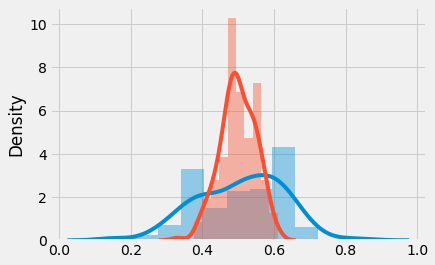

In [8]:
fix, ax = plt.subplots()
for sample in [sms, sml]:
    sns.distplot(sample)

In [9]:
def conf_int(data, level=0.95):
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = st.stats.sem(data)
    interval = stderr * st.stats.t.pff((1 + level) / 2.0, n - 1)
    return (mean, mean - interval, mean + interval)

In [10]:
cfm = []
for x in range(0, 100):
    cf = np.random.binomial(n=1, p=0.5, size=30)
    cfm.append(cf.mean())

In [11]:
from scipy.stats import t, ttest_1samp

n = len(cfm) # sample size
dof = n - 1 # degree of freedom
mean = np.mean(cfm) # mean of means
sampstd = np.std(cfm, ddof=1) # standard deviation
stderr = sampstd / n ** 0.5 # standard error
ci = t.interval(0.95, dof, loc=mean, scale=stderr)
print('95% Confidence Interval', ci)

95% Confidence Interval (0.48014076965222846, 0.5178592303477716)


In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
header = [
    'PARTY', 'HANDICAPPED_INF', 'WATER_PROJ', 'ADOPT_BUDJ', 
    'PHYS_FEE', 'SALV_AID', 'RELIG_SCHL', 'ANTI-SAT', 
    'NICA_AID', 'MX_MISS', 'IMMIGRATION', 'SYNF_CUT', 
    'EDU_SPEND', 'FUND_RTS', 'CRIME', 'EXPORTS', 'SA_EXPORTS']
house_votes = pd.read_csv(url, header=None, names=header, na_values='?')
house_votes.replace({'y': 1, 'n': 0}, inplace=True)
house_votes

,PARTY,HANDICAPPED_INF,WATER_PROJ,ADOPT_BUDJ,PHYS_FEE,SALV_AID,RELIG_SCHL,ANTI-SAT,NICA_AID,MX_MISS,IMMIGRATION,SYNF_CUT,EDU_SPEND,FUND_RTS,CRIME,EXPORTS,SA_EXPORTS
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


In [13]:
rep = house_votes[house_votes['PARTY'] == 'republican']
dem = house_votes[house_votes['PARTY'] == 'democrat']

In [14]:
rep

,PARTY,HANDICAPPED_INF,WATER_PROJ,ADOPT_BUDJ,PHYS_FEE,SALV_AID,RELIG_SCHL,ANTI-SAT,NICA_AID,MX_MISS,IMMIGRATION,SYNF_CUT,EDU_SPEND,FUND_RTS,CRIME,EXPORTS,SA_EXPORTS
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,republican,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


In [15]:
dem

,PARTY,HANDICAPPED_INF,WATER_PROJ,ADOPT_BUDJ,PHYS_FEE,SALV_AID,RELIG_SCHL,ANTI-SAT,NICA_AID,MX_MISS,IMMIGRATION,SYNF_CUT,EDU_SPEND,FUND_RTS,CRIME,EXPORTS,SA_EXPORTS
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
426,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
428,democrat,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
429,democrat,1.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0


In [19]:
dem.CRIME.value_counts()


0.0    167
1.0     90
Name: CRIME, dtype: int64

In [28]:
rep.CRIME.value_counts()

1.0    158
0.0      3
Name: CRIME, dtype: int64

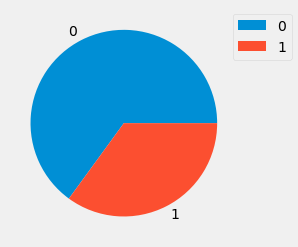

In [48]:
plt.pie(dem.CRIME.value_counts(), labels=[0, 1])
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

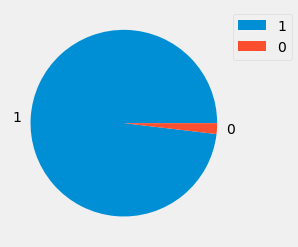

In [47]:
plt.pie(rep.CRIME.value_counts(), labels=[1, 0])
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

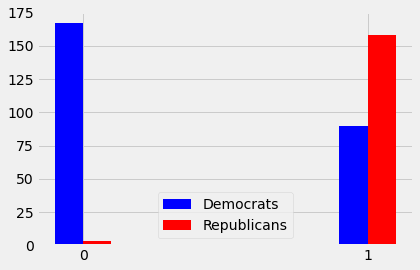

In [72]:
x = ['0', '1']
x_ax = np.arange(len(x))
y_dem = dem.CRIME.value_counts()
y_rep = rep.CRIME.value_counts()
y_rep = y_rep.sort_values(ascending=True)
plt.bar(x_ax - 0.05, y_dem, 0.1, label='Democrats', color='b')
plt.bar(x_ax + 0.05, y_rep, 0.1, label='Republicans', color='r')
plt.legend()
plt.xticks([0, 1])
plt.show()